In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison

In [12]:
# Task 1: Data Preparation and Exploration
# Read the dataset
data = pd.read_csv('Employee_Performance.csv')
print(data.head())

   EmployeeID Department  Gender  Experience  TrainingHours  \
0        1001         IT    Male           4              5   
1        1002  Marketing  Female           0             50   
2        1003      Sales    Male           0              5   
3        1004         HR    Male           1              5   
4        1005         HR  Female           9              5   

   PerformanceRating  Salary  
0               1.00   19000  
1               5.50    6900  
2               1.00    6000  
3               1.00    6000  
4               1.04   38000  


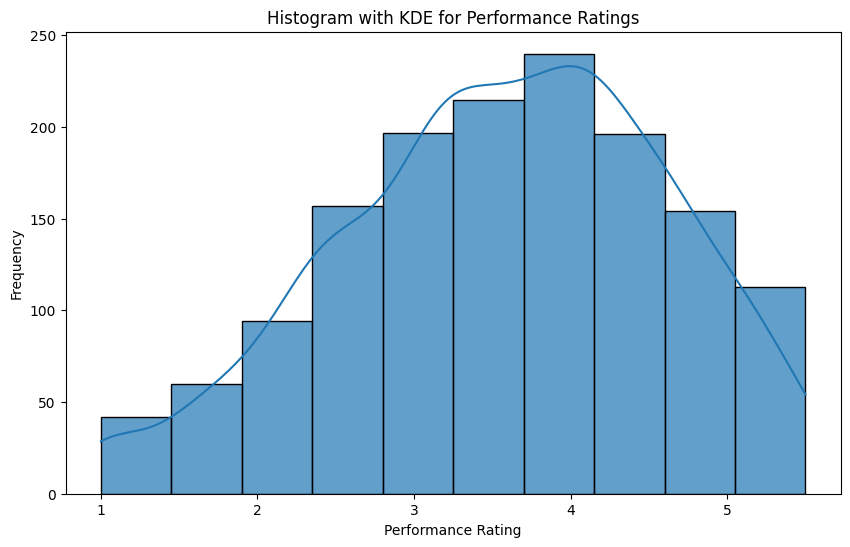

In [9]:
# Task 1: Data Preparation and Exploration
# Histogram of performance ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='PerformanceRating', kde=True, bins=10, alpha=0.7)
plt.title('Histogram with KDE for Performance Ratings')
plt.xlabel('Performance Rating')
plt.ylabel('Frequency')
plt.show()

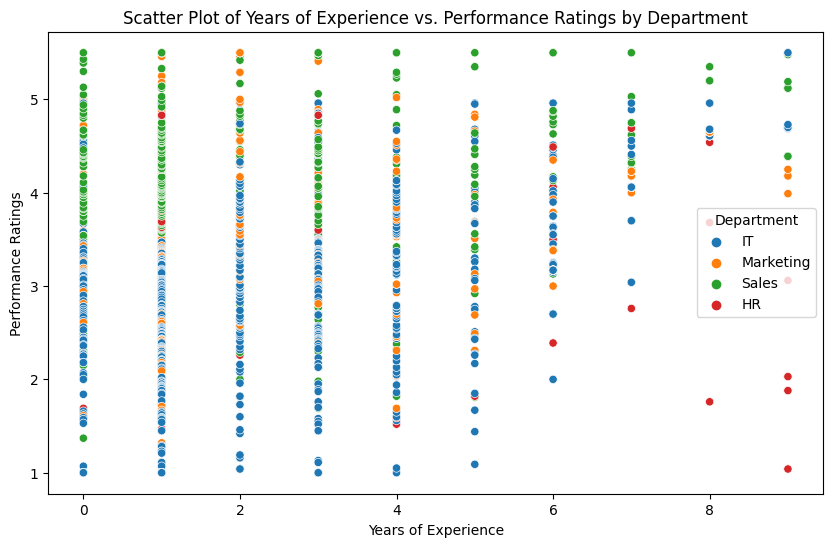

In [4]:
# Task 1: Data Preparation and Exploration
# Scatter plot of performance ratings by detpartment compared to years of experience
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Experience', y='PerformanceRating', hue='Department')
plt.xlabel('Years of Experience')
plt.ylabel('Performance Ratings')
plt.title('Scatter Plot of Years of Experience vs. Performance Ratings by Department')
plt.show()

In [5]:
# Task 1: Data Preparation and Exploration
# Performance ratings by department
grouped_data = [data[data['Department'] == department]['PerformanceRating'] for department in data['Department'].unique()]
f_statistic, p_value = stats.f_oneway(*grouped_data) # Perform one-way ANOVA

# Degrees of freedom
df_between = len(data['Department'].unique()) - 1 
df_within = len(data) - len(data['Department'].unique())
alpha = 0.05 # Significance level
critical_f_value = stats.f.ppf(1 - alpha, df_between, df_within) # Calculate the critical F-value based on alpha and degrees of freedom

print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"Critical F-value: {critical_f_value:.2f}")
print(f"P-value: {p_value:.4f}")

One-way ANOVA Results:
F-statistic: 61.45
Critical F-value: 2.61
P-value: 0.0000


In [6]:
# Task 1: Data Preparation and Exploration
# Tuke's HSD Post Hoc Test
multicomp = MultiComparison(data['PerformanceRating'], data['Department'])
result = multicomp.tukeyhsd()

print("\nTukey's HSD Post Hoc Test:")
print(result)


Tukey's HSD Post Hoc Test:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
       HR        IT   0.3715 0.0217  0.0384 0.7047   True
       HR Marketing    1.027    0.0  0.6681  1.386   True
       HR     Sales   1.0256    0.0  0.6843 1.3669   True
       IT Marketing   0.6555    0.0  0.4665 0.8445   True
       IT     Sales   0.6541    0.0  0.5012  0.807   True
Marketing     Sales  -0.0014    1.0 -0.2044 0.2017  False
---------------------------------------------------------
